In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar  9 14:52:22 2021

@author: Nathan
"""


import pandas as pd
import numpy as np

import matplotlib as mpl 
import matplotlib.pyplot as plt  
import interactive_plot as ip

import scipy as sp 
from scipy.optimize import curve_fit 



In [2]:
# c = 0.2
# w0 = 0.8927 # hz natural frequency of oscillator
# gamma = 0.378 # undamped 
N = 4000 # number of samples per data frame
TOTAL_TIME = 20 # total sample time, in seconds
PI = np.pi
w0 = 5.3932 # natural frequency

damp_param = pd.read_csv("d5.lvm", comment = '#', delim_whitespace=True, 
                            names=['time (s)', 'ang vel (rad/s)', 'ang position (theta)'])
damp_param


,time (s),ang vel (rad/s),ang position (theta)
0,0.000,-0.006998,1.629698
1,0.005,-0.001911,1.624602
2,0.010,-0.008269,1.613136
3,0.015,-0.001911,1.604218
4,0.020,0.004446,1.588929
...,...,...,...
995,4.975,0.046408,-0.933649
996,4.980,0.047679,-0.937471
997,4.985,0.043865,-0.951486
998,4.990,0.047679,-0.966774


In [3]:
def underDampedMotion(t, A, gamma, w1, d):
    exponent = (-1)*gamma*t
    argument = (w1*t) - d
    return A*np.exp(exponent)*np.cos(argument)

In [4]:
def underDampedMotionPlot(t, A, gamma, w1, d):
    exponent = (-1)*gamma*t
    argument = (w1*t) - d
    return A*np.exp(exponent)*np.cos(argument)-0.7

In [5]:
def harmonic(t, A, d, w):
    return A*np.cos(w*t-d)

In [6]:
t = damp_param['time (s)']
theta = damp_param['ang position (theta)'] 
v = damp_param['ang vel (rad/s)']


In [7]:
time_between_samples = TOTAL_TIME/N
zero_crossings = np.where(np.diff(np.sign(theta)))[0]
time_zero_crossings = []

for i in zero_crossings:
    time_zero_crossings.append(t[i])
print(time_zero_crossings)
    
# motion crosses the x-axis three times for every wavelength 
period = []
i = 0
while i + 2 < len(time_zero_crossings):
    p = time_zero_crossings[i+2] - time_zero_crossings[i]
    period.append(p)
    i += 3
avg_period = np.mean(period)
print(avg_period)

# convert to angular velocity
w = 2*PI/avg_period
print(w)

# find gamma
ratio = (w/w0)**2
gamma = np.sqrt(1-ratio)
print(gamma)

[0.195, 0.905, 1.33, 2.11, 2.445, 3.35, 3.515]
1.1875
5.291103416572283
0.19365654752518885


A, gamma, w1, d (final answer)  [-2.71640184  0.38321875  5.33689831  2.77433624]


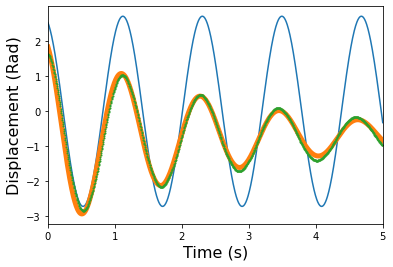

In [8]:
# Generate best fit parameters
popt, pcov = curve_fit(underDampedMotion, t, theta)
print('A, gamma, w1, d (final answer) ', popt) 
A = popt[0]
gamma = popt[1]
w1 = popt[2]
d = popt[3]

xFit = np.linspace(0, 5, 1000)
yFit = underDampedMotionPlot(xFit, A, gamma, w1, d)
har = harmonic(xFit, A, d, w)

%matplotlib inline
plt.plot(xFit, har, label='Harmonic')
plt.plot(xFit, yFit, label='Fit', linewidth=5)
plt.plot(t, theta, marker='o', markersize=1, linestyle='None', label='Data')
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Displacement (Rad)', fontsize=16)
plt.xlim(0, 5)
plt.savefig('Light Damping Motion (PDF).pdf', format='pdf')
plt.savefig('Light Damping Motion (SVG).svg', format='svg')
plt.show()

In [9]:
# Generate best guess for fit parameters
fitparams = [['A',-3,3,0.0,0.1],['gamma',0.1,2,1,0.01],['w1',0.1,6,0.1,0.25],['d',0.01,5,0.25,0.1]]
function = underDampedMotion  #name of fit function
plotparams = [['x',0,5.0],['y',-3,3],[500]] #set scales for plot. 500 points.
xData = t 
yData = theta 
xErr = None
yErr = None
%matplotlib qt



ip.slider_plot(fitparams,function,plotparams,xData,yData,xErr,yErr)

In [11]:
dw1 = np.sqrt(pcov[2][2])
print(dw1)

0.021526468624162794
